### 0. 기본 설정

In [3]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np

macbook = pd.read_csv('~/workplace/aiffel/Exploration/05. bike_regression/macbook_data/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


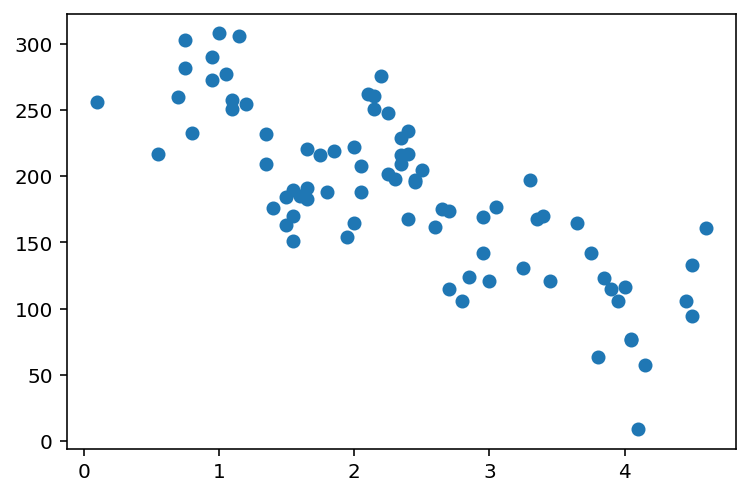

In [4]:
# matplotlib 2차원 그래프 

plt.scatter(macbook['used_years'], macbook['price']) # x축, y축
plt.show()

# 사용 연수가 높아질수록 중고가가 낮아지는 형태를 보인다.
# 음의 상관 관계가 있다.

### 1. 상관관계
#### 1-1. 상관관계
- 한 변수가 커짐에 따라 다른 변수가 작아지는 관계, 두 변수는 '상관 관계'가 있다.
- 관계된 정도는 Pearson 상관 계수
- 상관 계수 값은 -1 ~ 1 사이의 값
- 상관 관계가 없다면 상관계수 값은 0 (데이터 분포 넓게 퍼지며 원에 가까워질수록)
- 상관 관계가 강하다면 절대값 1에 가까워진다. (데이터 분포 직선에 가까워진다.)
- 두 변수 간의 패턴을 나타내는 것이 아닌, 각 값의 증가 또는 감소에 대한 관계만을 나타낸다.

#### 1-2. 인과관계
- 상관 관계는 인과 관계의 필요조건이나 충분 조건이 아니다.

#### 1-3. corrcoef() 상관계수 보여주는 함수
np.corrcoef(x, y)

In [6]:
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

- 변수가 2개이기 때문에 2x2 행렬로 나타난다.
- (0, 0), (1, 1) 위치는 각각 첫 번째 변수와 첫 번째 변수, 두 번째 변수와 두 번째 변수끼리의 상관계수를 나타내기 때문에 항상 1이 된다.
- (0, 1)과 (1, 0) 위치에는 첫 번째 변수와 두 번째 변수 간의 상관계수가 나타나며, 강한 음의 상관계수를 보인다.

### 2. 회귀 분석
#### 2-1. 모델
- 모델은 '특정 정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수'이다.
- 입력: 사용연수, 출력: 중고가

In [4]:
x = macbook["used_years"].values
y = macbook["price"].values

In [5]:
# 기울기 w, y절편 b
def model(x, w, b):
    y = w * x + b
    return y

In [10]:
# 예시 모델
model(x=5, w=2, b=1)

11

#### 2-2. 모델을 학습시킨다는 것은?
- 모델이 입력을 받았을 때 정답값에 가까운 출력을 낼 수 있는 최적의 "매개변수", 혹은 "파라미터"를 찾는다.
- 방정식을 푼다.
    - 사용연수가 2년인 맥북의 중고가: 100만 원 
    - 사용연수가 5년인 맥북의 중고가: 40만 원
        > 100 = w x 2 + b
        
        > 40 = w x 5 + b
    
    - w = - 20, b = 140

#### 2-3. 그래프

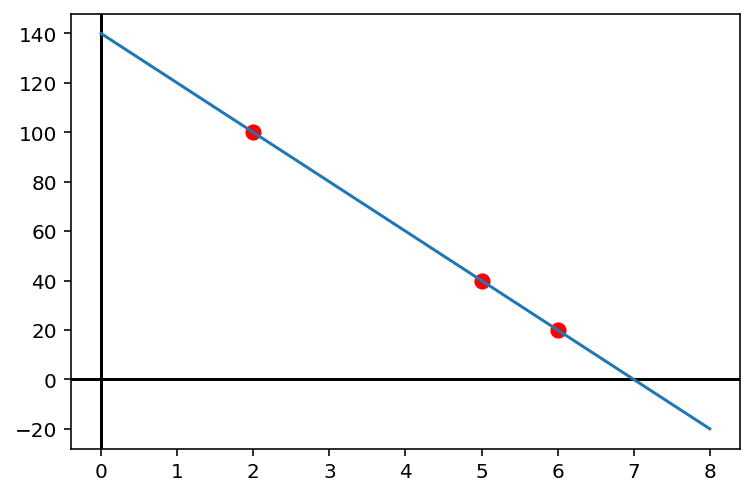

In [12]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

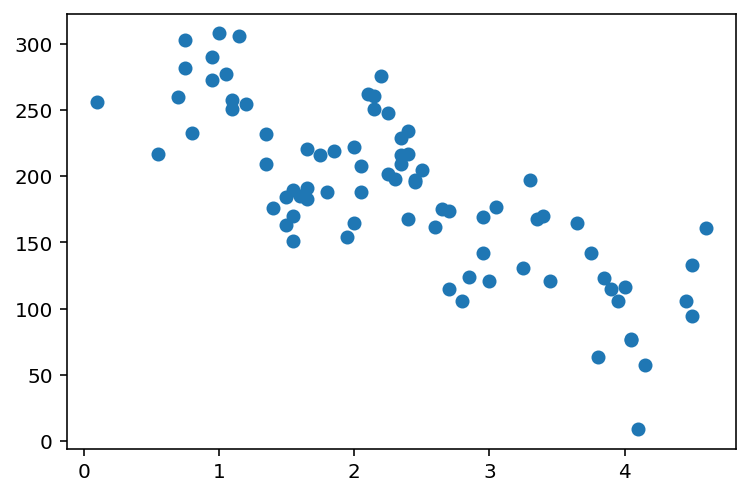

In [13]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

#### 2-4. 손실함수, 최적의 방정식
#### 2-4-1. 손실함수
- 최적의 함수
- 아직 불완전한 현재의 모델이 출력하는 값과 실제 정답 간의 차이 줄여나가기
    - 먼저, 모델이 출력하는 값과 실제 정답 간의 차이를 계산
    - 그 차이를 단계적으로 줄여나가기

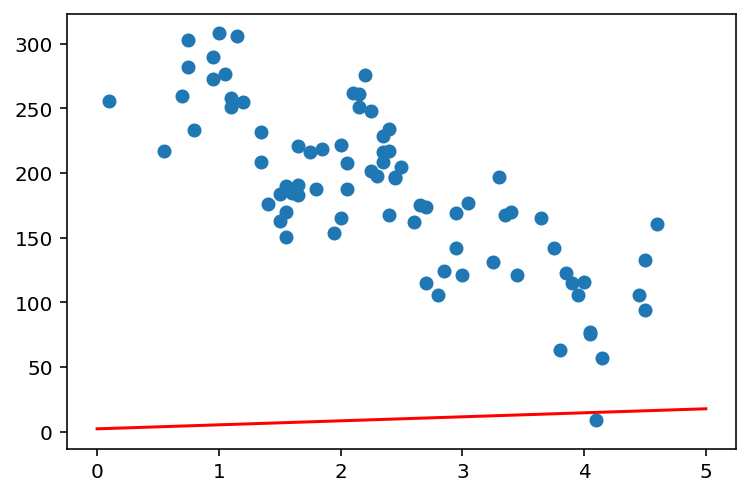

In [6]:
# 예시
w = 3.1
b = 2.3

# 나쁜 그래프
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [7]:
x = macbook["used_years"].values
x
prediction = model(x, w, b) # y값, 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [8]:
# 새로운 칼럼에 y값 넣기, 아직은 price 값과 큰 차이
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [9]:
# 정답과 예측값 간의 차이 error 칼럼
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


#### 2-4-2. Error
- MAE (Mean Absolute Error): 실제값과 예측값 차이의 평균의 절대값
- MSE (Mean Squared Error): 실제값과 예측값 차이의 제곱의 평균
- RMSE (Root Mean Squared Error): MSE의 제곱근
- R-squared (Coefficient of determination): 결정계수 $1 - SSE(회귀식과 실제값의 차이)/SST(편차의 제곱합)$ 

d = original-predicted
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((original-mean(original))^2))

In [11]:
# RMSE 함수
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

In [12]:
# 우리 모델 적용
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [13]:
# predictions와 y 간 rmse
rmse = RMSE(predictions, y)
rmse
# 모델이 너무 부정확해서 rmse값 매우 크다

188.81322969819274

**Wrap up**
- 모델의 예측값과 정답값에 대한 차이를 계산하는 함수: 손실함수(loss function), 또는 비용함수(cost function)
- 즉, 손실값(loss)이 크다는 것은 모델이 현재 정답과 굉장히 먼 예측을 하고 있다는 뜻이고, 손실값이 작다는 것은 모델이 정답에 가까운, 올바른 예측을 하고 있다는 것으로 해석할 수 있다. 따라서 손실값은 작을수록 좋다.
- 모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수

In [14]:
# 손실함수
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

#### 2-5. 손실함수 줄이기
#### 2-5-1. 기울기와 경사하강법
- 바꿀 수 있는 건, w, b
- 설명:
    - 최적의 b를 찾았다는 가정 하에, w 변수에 집중
    - x축은 w이고, y축은 손실함수의 함수값, loss값
    - 원하는 것은 손실함수의 값이 0이 되는 것, 아니면 최소한 0에 가까운 작은 값이 되는 것
    - 처음부터 최적의 w를 알지 못하기 때문에, 랜덤으로 w를 아무렇게나 선택했고, 결과적으로 파란색에 위치한 것처럼 현재의 loss 값은 매우 크다.

In [15]:
# 손실함수
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

**- 최적의 w를 찾기 위해서는,**
    - 만약 현재의 w가 최적의 w의 왼쪽 에 위치하고 있다면 현재의 w가 최적의 w보다 작다는 의미이므로 우리는 현재의 w가 커지도록 늘려야 한다.
    - 반대로 오른쪽 에 위치하고 있다면 현재의 w 값이 최적의 w 값보다 크다는 의미이므로 현재의 w 값이 작아지도록 줄여야 한다.
    
**- 최적의 w 값이 무엇인지를 모르기 때문에, 현재 w 값 또한 최적의 w보다 큰지 혹은 작은지를 알 수 없다.**
    - 기울기, 그래디언트를 사용한다!
    - 왼쪽 점은 자기 자신의 위치보다 오른쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 오른쪽 아래로 향하는 방향 이고, 그 기울기는 음수이다.
    - 오른쪽 점은 자기 자신의 위치보다 왼쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 왼쪽 아래로 향하는 방향이고, 그 기울기는 양수이다. 

**- w 업데이트**
1. 현재 w에서의 기울기를 구한다.
2. 기울기가 음수라면, 현재 w를 키운다.
3. 기울기가 양수라면, 현재 w를 줄인다.

**w′ = w − ηg**

- w′ : 새로운 `w`
- w : 현재 `w`
- η : 얼마나 업데이트를 할 지를 결정하는 상수 (학습률)
- g : 기울기, 또는 그래디언트

- 즉, g가 음수라면 w − g 식에서 w에서 음수를 빼주게 되므로 w는 커진다.
- 반면, g가 양수라면 w − g 식에서 w에서 양수를 빼주게 되므로 w는 작아진다.

- 여기에서 η 는 고정되어 있는 상수로써 w를 변화시키는 양을 조절하는 역할을 한다.
- 즉, w − ηg에서 g는 키울지, 줄일지에 대한 "방향과 크기"를, η는 얼마나 키울지/줄일지에 대한 "배율"을 결정한다.


**Wrap up**

기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식을 Gradient Descent Method, 즉 경사하강법이라 한다.

#### 2-5-2. 미분으로 경사 구하기
**수치미분**

- 근사한 미분계수 값을 찾는 방법

**변수 w, b 두 가지의 기울기를 모두 계산하는 gradient 함수**
#### 5-5 미분 이해 안됨

In [16]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

#### 2-6. 정의된 손실함수와 기울기 함수로 모델 학습시켜 최적화하기
#### 2-6-1. 하이퍼 파라미터
- 경사하강법에서 필요했던 학습률, η 상수
- 사람이 직접 사전에 정하고 시작해야 하는 파라미터

In [17]:
# 1이 아니어도 상관 없음
# 복잡한 데이터셋에서는 보통 학습률을 0.0001 ~ 0.01 정도의 작은 값
LEARNING_RATE = 1

1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 w′ = w − ηg , b′ = b − ηg 로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복

#### 2-6-2. 모델 최적화

In [18]:
x = macbook["used_years"].values
y = macbook["price"].values

In [33]:
# 초기 랜덤 값
w = 3.1
b = 2.3
w, b

(3.1, 2.3)

In [20]:
losses = []

In [21]:
# 학습 진행
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 107.8708
Iteration 200 : Loss 94.4397
Iteration 300 : Loss 81.7335
Iteration 400 : Loss 70.0698
Iteration 500 : Loss 59.8849
Iteration 600 : Loss 51.6766
Iteration 700 : Loss 45.7883
Iteration 800 : Loss 42.1201
Iteration 900 : Loss 40.1217
Iteration 1000 : Loss 39.1354
Iteration 1100 : Loss 38.6763
Iteration 1200 : Loss 38.4689
Iteration 1300 : Loss 38.3766
Iteration 1400 : Loss 38.3358
Iteration 1500 : Loss 38.3178
Iteration 1600 : Loss 38.3098
Iteration 1700 : Loss 38.3063
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


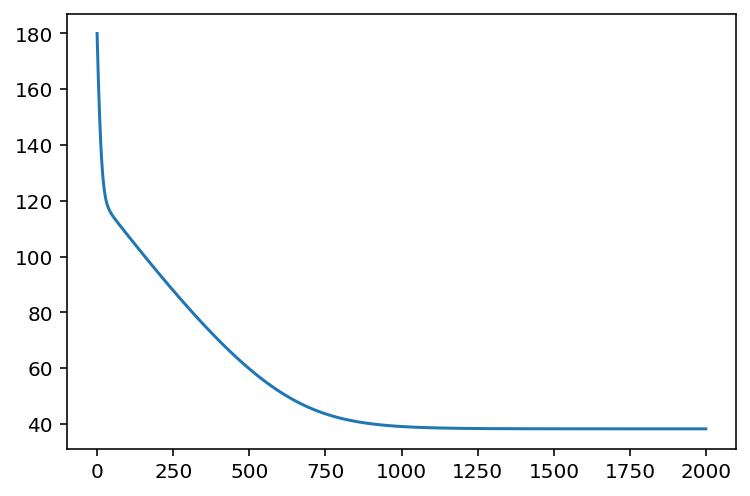

In [37]:
plt.plot(losses)
plt.show()

In [38]:
# 현재의 가중치
w, b

(-44.92802735596856, 293.082887486003)

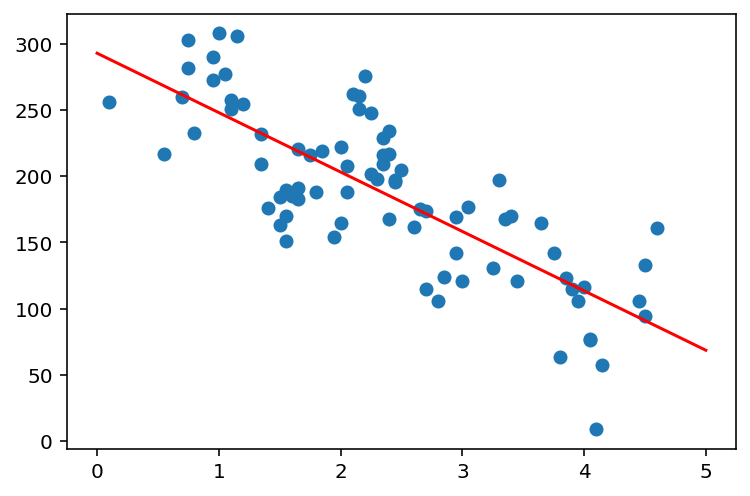

In [22]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

#### 2-6-3. 테스트

In [23]:
# test 데이터
test = pd.read_csv('~/workplace/aiffel/Exploration/05. bike_regression/macbook_data/data/macbook_test.csv')
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [24]:
test_x = test['used_years'].values
test_y = test['price'].values
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.169255
1,1.85,206,209.966037
2,2.40,191,185.255622
3,2.85,164,165.038010
4,3.05,176,156.052404
5,3.35,136,142.573996
6,2.55,133,178.516418
7,2.60,181,176.270016
8,2.50,181,180.762819
9,3.10,86,153.806003


In [25]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.169255,-36.169255
1,1.85,206,209.966037,-3.966037
2,2.40,191,185.255622,5.744378
3,2.85,164,165.038010,-1.038010
4,3.05,176,156.052404,19.947596
5,3.35,136,142.573996,-6.573996
6,2.55,133,178.516418,-45.516418
7,2.60,181,176.270016,4.729984
8,2.50,181,180.762819,0.237181
9,3.10,86,153.806003,-67.806003


In [26]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.039281182770374

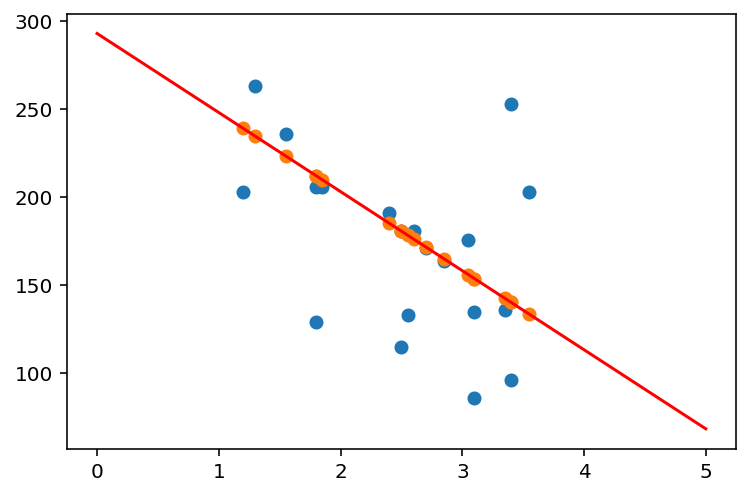

In [27]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

### 3. 다변수 선형회귀
- 다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계

In [28]:
import seaborn as sns

In [29]:
# 데이터 로드
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- get_dummies() 
    - 문자열 데이터에 대해서 0, 1 로 변환
    - 회귀식에서 해당 변수의 효과를 0 또는 상수값으로 만들어 준다.
    - 원-핫 인코딩

In [30]:
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [31]:
# 나머지 데이터를 가지고 tip 값 예측
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


#### 3-1. 선형 회귀
- 다변수 일차방정식
- $y = w1x1 + w2x2 + x3w3 + ...... + w12x12 + b$
- b 는 $w0$ 으로 표현
    - $y = w0*1 + w1x1 + w2x2 + x3w3 + ...... + w12x12$

In [33]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [35]:
W = np.random.rand(12)
b = np.random.rand()

In [36]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [37]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [39]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

#### 3-2. 기울기 구하기

In [ ]:
# 5-9 참고

In [1]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [40]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: 160.149796513398
db: 5.7561911747683325


#### 3-3. 모델 학습

Iteration 10 : Loss 1.7177
Iteration 20 : Loss 1.4328
Iteration 30 : Loss 1.4155
Iteration 40 : Loss 1.4133
Iteration 50 : Loss 1.4129
Iteration 60 : Loss 1.4127
Iteration 70 : Loss 1.4125
Iteration 80 : Loss 1.4124
Iteration 90 : Loss 1.4123
Iteration 100 : Loss 1.4121
Iteration 110 : Loss 1.4120
Iteration 120 : Loss 1.4118
Iteration 130 : Loss 1.4117
Iteration 140 : Loss 1.4116
Iteration 150 : Loss 1.4114
Iteration 160 : Loss 1.4113
Iteration 170 : Loss 1.4111
Iteration 180 : Loss 1.4110
Iteration 190 : Loss 1.4109
Iteration 200 : Loss 1.4107
Iteration 210 : Loss 1.4106
Iteration 220 : Loss 1.4104
Iteration 230 : Loss 1.4103
Iteration 240 : Loss 1.4102
Iteration 250 : Loss 1.4100
Iteration 260 : Loss 1.4099
Iteration 270 : Loss 1.4097
Iteration 280 : Loss 1.4096
Iteration 290 : Loss 1.4095
Iteration 300 : Loss 1.4093
Iteration 310 : Loss 1.4092
Iteration 320 : Loss 1.4091
Iteration 330 : Loss 1.4089
Iteration 340 : Loss 1.4088
Iteration 350 : Loss 1.4086
Iteration 360 : Loss 1.4085
I

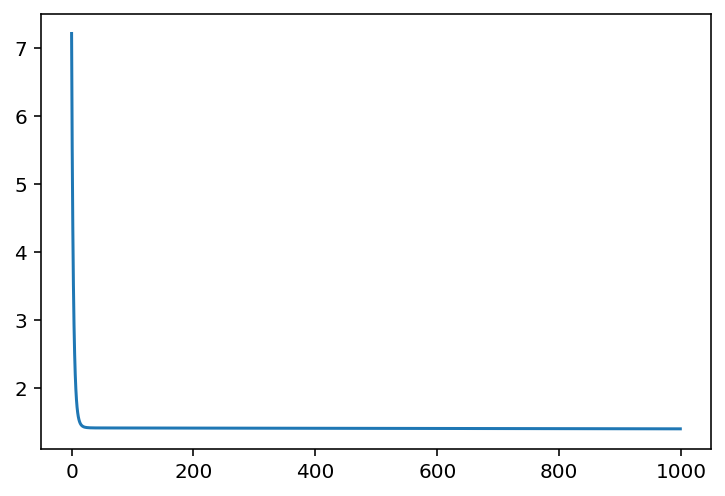

In [41]:
LEARNING_RATE = 0.0001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

In [42]:
W, b

(array([ 0.04090978,  0.23161149,  0.34907709,  0.47050372,  0.36057376,
         0.78399853,  0.81899553,  0.78700436,  0.52471809,  0.68196139,
         0.18306897, -0.0235537 ]),
 0.13238817367968414)

In [43]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.1468923585062283

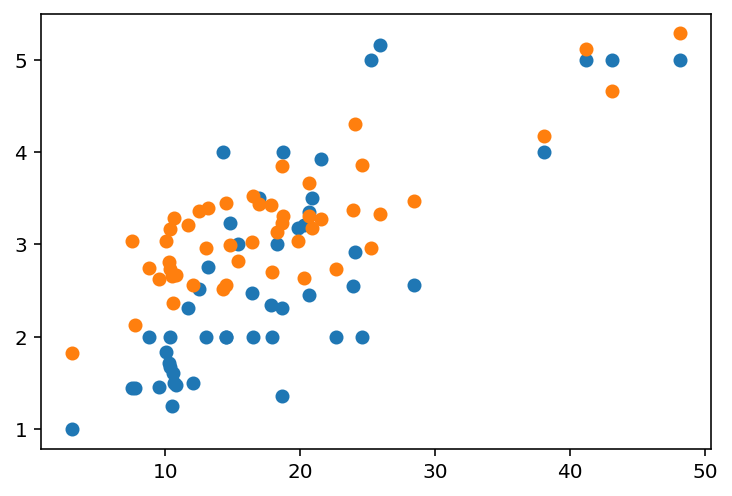

In [44]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

#### 3-4. sklearn 모델

In [45]:
# 데이터 준비
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [ ]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [46]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [48]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# 예측
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [50]:
# 성능 평가
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

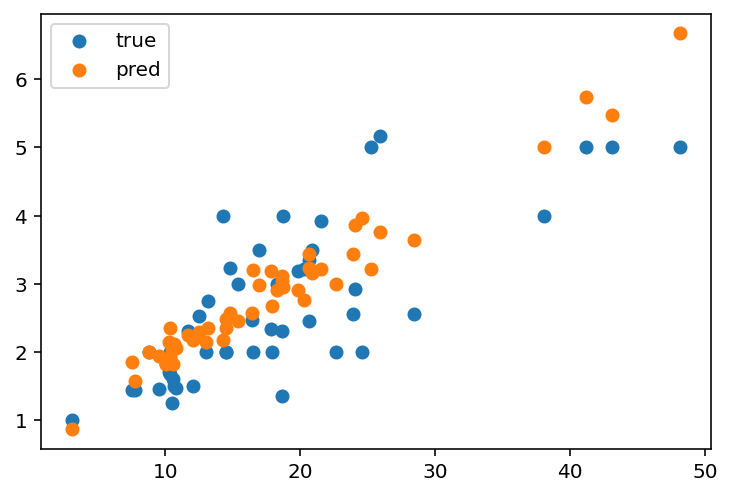

In [51]:
# 시각화
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()